In [1]:
import pandas as pd

In [2]:
# 처음 10행만 불러와서 구조 파악
file_path = '/Users/osaeha/Desktop/대외활동/BDA 제 4회 채용 공모전/rtu_data_full.csv'
df_preview = pd.read_csv(file_path, nrows=10)

In [3]:
display(df_preview)

,module(equipment),timestamp,localtime,operation,voltageR,voltageS,voltageT,voltageRS,voltageST,voltageTR,currentR,currentS,currentT,activePower,powerFactorR,powerFactorS,powerFactorT,reactivePowerLagging,accumActiveEnergy
0,1(PM-3),1733040000000,20241201000000,1,214.38,214.45,219.10,371.37,375.45,375.39,15.16,15.53,20.65,2961.61,87.31,99.71,89.45,785.37,1955004
1,1(PM-3),1733040005000,20241201000005,1,214.05,211.74,218.68,368.73,372.74,374.74,25.70,7.07,19.75,3017.48,87.54,87.67,94.17,376.57,1955008
2,1(PM-3),1733040010000,20241201000010,1,215.79,214.92,211.10,373.00,368.94,369.69,13.64,14.87,13.70,2408.01,85.46,99.00,94.45,296.08,1955011
3,1(PM-3),1733040015000,20241201000015,1,210.39,214.92,215.57,368.32,372.80,368.89,25.76,26.35,5.80,3289.33,85.24,99.53,95.61,488.48,1955016
4,1(PM-3),1733040020000,20241201000020,1,216.71,216.37,215.65,375.05,374.13,374.43,8.65,29.49,15.09,3069.31,92.81,91.26,91.82,604.70,1955020
5,1(PM-3),1733040025000,20241201000025,1,214.18,212.75,212.91,369.72,368.63,369.86,15.28,5.49,7.00,1581.48,85.81,86.24,95.07,196.52,1955022
6,1(PM-3),1733040030000,20241201000030,1,210.19,215.21,215.93,368.40,373.37,369.02,15.20,7.93,19.89,2452.03,85.38,89.21,99.49,347.07,1955026
7,1(PM-3),1733040035000,20241201000035,1,216.97,217.18,211.22,375.98,370.99,370.81,25.93,7.30,24.17,3285.18,90.91,97.85,94.29,657.36,1955030
8,1(PM-3),1733040040000,20241201000040,1,215.83,214.80,213.34,372.93,370.77,371.66,29.51,24.10,9.22,3603.09,96.07,98.72,99.46,906.10,1955035
9,1(PM-3),1733040045000,20241201000045,1,213.49,210.77,213.94,367.41,367.80,370.15,8.35,28.93,21.71,3339.72,93.19,91.22,88.72,634.52,1955040


In [12]:
#1. 설비 리스트 및 개수 확인 코드
import pandas as pd

# 1. 파일 경로 설정
file_path = 'rtu_data_full.csv'

# 2. 메모리 절약을 위해 'module(equipment)' 컬럼만 로드
# 전체 데이터를 다 불러오면 메모리 오류가 날 수 있으므로 필요한 컬럼만 지정합니다.
try:
    equipment_col = pd.read_csv(file_path, usecols=['module(equipment)'])
    
    # 3. 고유 설비 리스트 및 개수 확인
    unique_equipments = equipment_col['module(equipment)'].unique()
    equipment_counts = equipment_col['module(equipment)'].value_counts()
    
    print(f"✅ 총 설비 대수: {len(unique_equipments)}대")
    print("-" * 30)
    print("✅ 설비 목록 및 데이터 포인트 수:")
    print(equipment_counts)
    
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인해주세요.")

✅ 총 설비 대수: 13대
------------------------------
✅ 설비 목록 및 데이터 포인트 수:
1(PM-3)       2592001
2(L-1전등)      2592001
3(분쇄기(2))     2592001
4(분쇄기(1))     2592001
5(좌측분전반)      2592001
11(우측분전반1)    2592001
12(4호기)       2592001
13(3호기)       2592001
14(2호기)       2592001
15(예비건조기)     2592001
16(호이스트)      2592001
17(6호기)       2592001
18(우측분전반2)    2592001
Name: module(equipment), dtype: int64


### 1. 1단계 가벼운 EDA
- 데이터의 결측치 비율과 분산의 정도 파악

In [7]:
# 1. 데이터 로드 (전체 컬럼))
df= pd.read_csv('rtu_data_full.csv')

In [6]:
# 전체 요약 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696013 entries, 0 to 33696012
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   module(equipment)     object 
 1   timestamp             int64  
 2   localtime             int64  
 3   operation             int64  
 4   voltageR              float64
 5   voltageS              float64
 6   voltageT              float64
 7   voltageRS             float64
 8   voltageST             float64
 9   voltageTR             float64
 10  currentR              float64
 11  currentS              float64
 12  currentT              float64
 13  activePower           float64
 14  powerFactorR          float64
 15  powerFactorS          float64
 16  powerFactorT          float64
 17  reactivePowerLagging  float64
 18  accumActiveEnergy     int64  
dtypes: float64(14), int64(4), object(1)
memory usage: 4.8+ GB
None


In [9]:
# 3. 컬럼별 결측치(NULL) 확인
# 시계열의 연속성을 해치는 결측 구간이 있는지 확인
print(df.isnull().sum())

module(equipment)       0
timestamp               0
localtime               0
operation               0
voltageR                0
voltageS                0
voltageT                0
voltageRS               0
voltageST               0
voltageTR               0
currentR                0
currentS                0
currentT                0
activePower             0
powerFactorR            0
powerFactorS            0
powerFactorT            0
reactivePowerLagging    0
accumActiveEnergy       0
dtype: int64


In [10]:
# 4. 수치형 데이터 기술 통계
# 전압(v), 전류(I), 전력(p)의 범위를 확인하여 이상치 outlier을 탐색
display(df.describe())

,timestamp,localtime,operation,voltageR,voltageS,voltageT,voltageRS,voltageST,voltageTR,currentR,currentS,currentT,activePower,powerFactorR,powerFactorS,powerFactorT,reactivePowerLagging,accumActiveEnergy
count,3.369601e+07,3.369601e+07,33696013.0,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07
mean,1.739519e+12,2.024839e+13,1.0,2.149938e+02,2.149947e+02,2.149943e+02,3.723700e+02,3.723705e+02,3.723697e+02,1.749940e+01,1.749925e+01,1.750193e+01,3.009952e+03,9.246882e+01,9.247004e+01,9.246884e+01,6.019452e+02,8.103413e+06
std,3.739821e+09,3.665090e+09,0.0,2.902114e+00,2.902552e+00,2.902357e+00,3.573077e+00,3.572666e+00,3.572804e+00,7.217217e+00,7.217180e+00,7.216743e+00,7.171454e+02,4.405299e+00,4.405555e+00,4.405619e+00,2.290785e+02,3.344950e+06
min,1.733040e+12,2.024120e+13,1.0,1.901000e+02,1.901400e+02,1.901800e+02,3.308300e+02,3.299500e+02,3.305600e+02,5.000000e+00,5.000000e+00,5.000000e+00,8.644400e+02,6.000000e+01,6.000000e+01,6.000000e+01,8.944000e+01,1.129004e+06
25%,1.736280e+12,2.025011e+13,1.0,2.125000e+02,2.125000e+02,2.125000e+02,3.698400e+02,3.698400e+02,3.698400e+02,1.125000e+01,1.125000e+01,1.125000e+01,2.503820e+03,8.873000e+01,8.873000e+01,8.873000e+01,4.231400e+02,5.393998e+06
50%,1.739520e+12,2.025021e+13,1.0,2.150000e+02,2.150000e+02,2.150000e+02,3.723800e+02,3.723800e+02,3.723800e+02,1.750000e+01,1.750000e+01,1.750000e+01,3.009850e+03,9.249000e+01,9.249000e+01,9.249000e+01,5.739700e+02,8.103386e+06
75%,1.742756e+12,2.025032e+13,1.0,2.175000e+02,2.175000e+02,2.175000e+02,3.749200e+02,3.749100e+02,3.749200e+02,2.375000e+01,2.375000e+01,2.375000e+01,3.515890e+03,9.624000e+01,9.625000e+01,9.624000e+01,7.554100e+02,1.081253e+07
max,1.745996e+12,2.025043e+13,1.0,2.200000e+02,2.200000e+02,2.200000e+02,3.810400e+02,3.810400e+02,3.810400e+02,3.000000e+01,3.000000e+01,3.000000e+01,5.220930e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.550630e+03,1.543817e+07


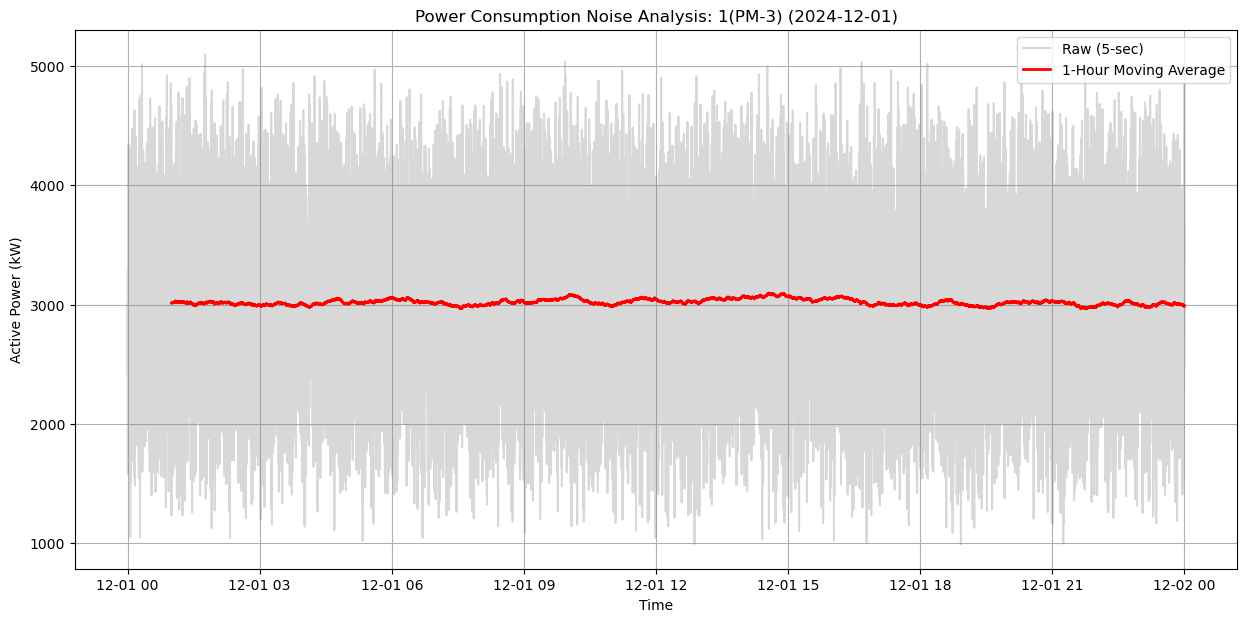

In [11]:
# 5초 단위 데이터 시각화 및 리샘플링 코드
# 데이터 셋의 첫 번째 날인 2024-12-01을 기준으로 원본 데이터와 1시간 이동 평균(Moving Average)데이터를 비교하여 시각화 한다.
import matplotlib.pyplot as plt

# 1. 시간 데이터 변환 
df['localtime'] = pd.to_datetime(df['localtime'], format ='%Y%m%d%H%M%S')
df.set_index('localtime', inplace=True)

# 2. 특정 설비의 하루치 데이터 추출 (2024-12-01)
target_eq = '1(PM-3)'
day_data = df[df['module(equipment)'] == target_eq].loc['2024-12-01']

# 3. 1시간(720개 샘플) 이동 평균 계산
# 5초 * 720 = 3600초 (1시간)
day_data['MA_1H'] = day_data['activePower'].rolling(window=720).mean()

# 4. 시각화: 원본 vs 1시간 이동 평균
plt.figure(figsize=(15, 7))
plt.plot(day_data.index, day_data['activePower'], label='Raw (5-sec)', alpha=0.3, color='gray')
plt.plot(day_data.index, day_data['MA_1H'], label='1-Hour Moving Average', color='red', linewidth=2)

plt.title(f'Power Consumption Noise Analysis: {target_eq} (2024-12-01)')
plt.xlabel('Time')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

### 2. 데이터 정제 및 고도화

In [16]:
import pandas as pd

# 1. 인덱스 초기화 (이미 인덱스로 설정되어 있다면 다시 컬럼으로 가져옵니다)
if df.index.name == 'localtime':
    df = df.reset_index()

# 2. 'localtime' 컬럼이 존재할 때만 시계열 변환 및 인덱스 설정 진행
if 'localtime' in df.columns:
    # 시간 데이터 형식 변환 (int64 -> datetime)
    df['localtime'] = pd.to_datetime(df['localtime'], format='%Y%m%d%H%M%S')
    # 인덱스 설정
    df.set_index('localtime', inplace=True)
    print("✅ 성공적으로 시계열 인덱스가 설정되었습니다.")
else:
    print("❌ 'localtime' 컬럼을 찾을 수 없습니다. df.columns를 확인하세요.")

# 3. 그 다음 작업 (물리적 정합성 필터링 및 리샘플링) 진행
# operation이 0인데 activePower가 있는 경우 보정
df.loc[df['operation'] == 0, 'activePower'] = 0

# 리샘플링 (1시간 단위)
agg_rules = {
    'activePower': 'mean',
    'operation': 'mean',
    'accumActiveEnergy': 'last',
    'voltageR': 'mean',
    'currentR': 'mean'
}

# 설비별 그룹화 후 리샘플링
df_hourly = df.groupby('module(equipment)').resample('H').agg(agg_rules).reset_index()
display(df_hourly.head())

✅ 성공적으로 시계열 인덱스가 설정되었습니다.


,module(equipment),localtime,activePower,operation,accumActiveEnergy,voltageR,currentR
0,1(PM-3),2024-12-01 00:00:00,3011.903014,1.0,1958011,214.942208,17.313111
1,1(PM-3),2024-12-01 01:00:00,3011.384833,1.0,1961023,215.008472,17.525125
2,1(PM-3),2024-12-01 02:00:00,2990.481861,1.0,1964013,214.989569,17.677333
3,1(PM-3),2024-12-01 03:00:00,3003.309125,1.0,1967017,214.940111,17.070875
4,1(PM-3),2024-12-01 04:00:00,3007.081417,1.0,1970024,214.757653,17.240861


### 3단계: 심층 EDA (통계적 속성 파악)
- 정제된 1시간 단위 데이터를 바탕으로 전공 지식을 발휘하는 단계입니다.
- 정상성(Stationarity) 테스트: ADF Test를 통해 데이터가 통계적으로 안정적인지 확인합니다.
- 자기상관 분석: ACF / PACF 그래프를 그려서 몇 시간 전의 데이터가 현재에 영향을 주는지(Lag 결정) 파악합니다.
- 설비별 상관관계: 13대 설비 간의 상관계수를 구해 함께 움직이는 설비 그룹을 찾습니다.
- 계절성 분해(Decomposition): 데이터를 추세(Trend), 계절성(Seasonal), 잔차(Residual)로 나누어 분석합니다.

In [19]:
### ADF 검정
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # ADF 검정 수행
    result = adfuller(series.dropna())
    
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    
    # p-value가 0.05보다 작으면 귀무가설 기각 (정상성 확보)
    if result[1] <= 0.05:
        print("=> 결과: 정상 시계열입니다. (Stationary)")
    else:
        print("=> 결과: 비정상 시계열입니다. 차분이 필요할 수 있습니다. (Non-Stationary)")

# 13대 설비 중 하나(예: 1(PM-3))를 선택해서 테스트
target_equipment = '1(PM-3)'
pm3_series = df_hourly[df_hourly['module(equipment)'] == target_equipment]['activePower']

print(f"--- [{target_equipment}] 전력 데이터 정상성 검정 ---")
check_stationarity(pm3_series)

--- [1(PM-3)] 전력 데이터 정상성 검정 ---
ADF Statistic: -43.9589
p-value: 0.0000
Critical Values:
   1%: -3.4322
   5%: -2.8623
   10%: -2.5672
=> 결과: 정상 시계열입니다. (Stationary)


In [20]:
## 13대 설비 전수 정상성 검사 코드
# 모든 설비에 대해 ADF Test 반복 실행
results = []

for eq in df_hourly['module(equipment)'].unique():
    series = df_hourly[df_hourly['module(equipment)'] == eq]['activePower'].dropna()
    adf_res = adfuller(series)
    results.append({
        'Equipment': eq,
        'ADF Statistic': adf_res[0],
        'p-value': adf_res[1],
        'Is Stationary': 'Yes' if adf_res[1] <= 0.05 else 'No'
    })

# 결과 표로 보기
df_adf = pd.DataFrame(results)
display(df_adf)

,Equipment,ADF Statistic,p-value,Is Stationary
0,1(PM-3),-43.958945,0.000000e+00,Yes
1,11(우측분전반1),-58.919466,0.000000e+00,Yes
2,12(4호기),-26.922401,0.000000e+00,Yes
3,13(3호기),-54.494324,0.000000e+00,Yes
4,14(2호기),-38.471952,0.000000e+00,Yes
5,15(예비건조기),-18.608730,2.066067e-30,Yes
6,16(호이스트),-55.644837,0.000000e+00,Yes
7,17(6호기),-45.406720,0.000000e+00,Yes
8,18(우측분전반2),-59.338930,0.000000e+00,Yes
9,2(L-1전등),-51.170159,0.000000e+00,Yes


/Users/osaeha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


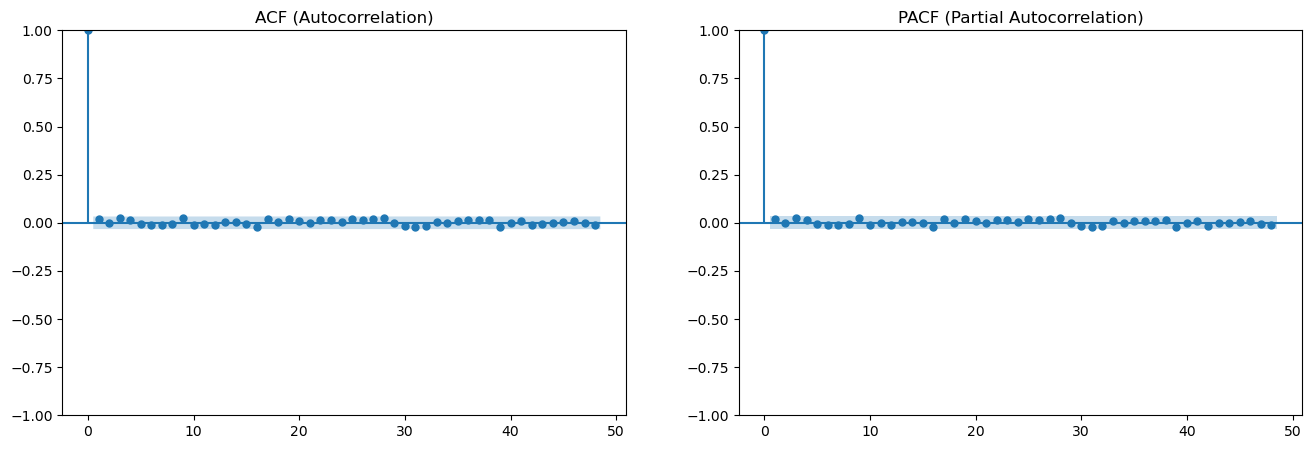

In [22]:
# ACF 및 PACF 분석 : 최적의 시차 Lag 찾기
# ARIMA(p,d,q) 모델의 차수를 결정하기 위해 사용
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1(PM-3) 설비 기준 분석
target_series = df_hourly[df_hourly['module(equipment)'] == '1(PM-3)']['activePower']

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# ACF: q(MA) 결정 / 계절성 확인 (공장 데이터는 보통 24시간 주기의 peak가 보임)
plot_acf(target_series, lags=48, ax=ax[0]) # 48시간(2일)까지 확인
ax[0].set_title('ACF (Autocorrelation)')

# PACF: p(AR) 결정
plot_pacf(target_series, lags=48, ax=ax[1])
ax[1].set_title('PACF (Partial Autocorrelation)')

plt.show()

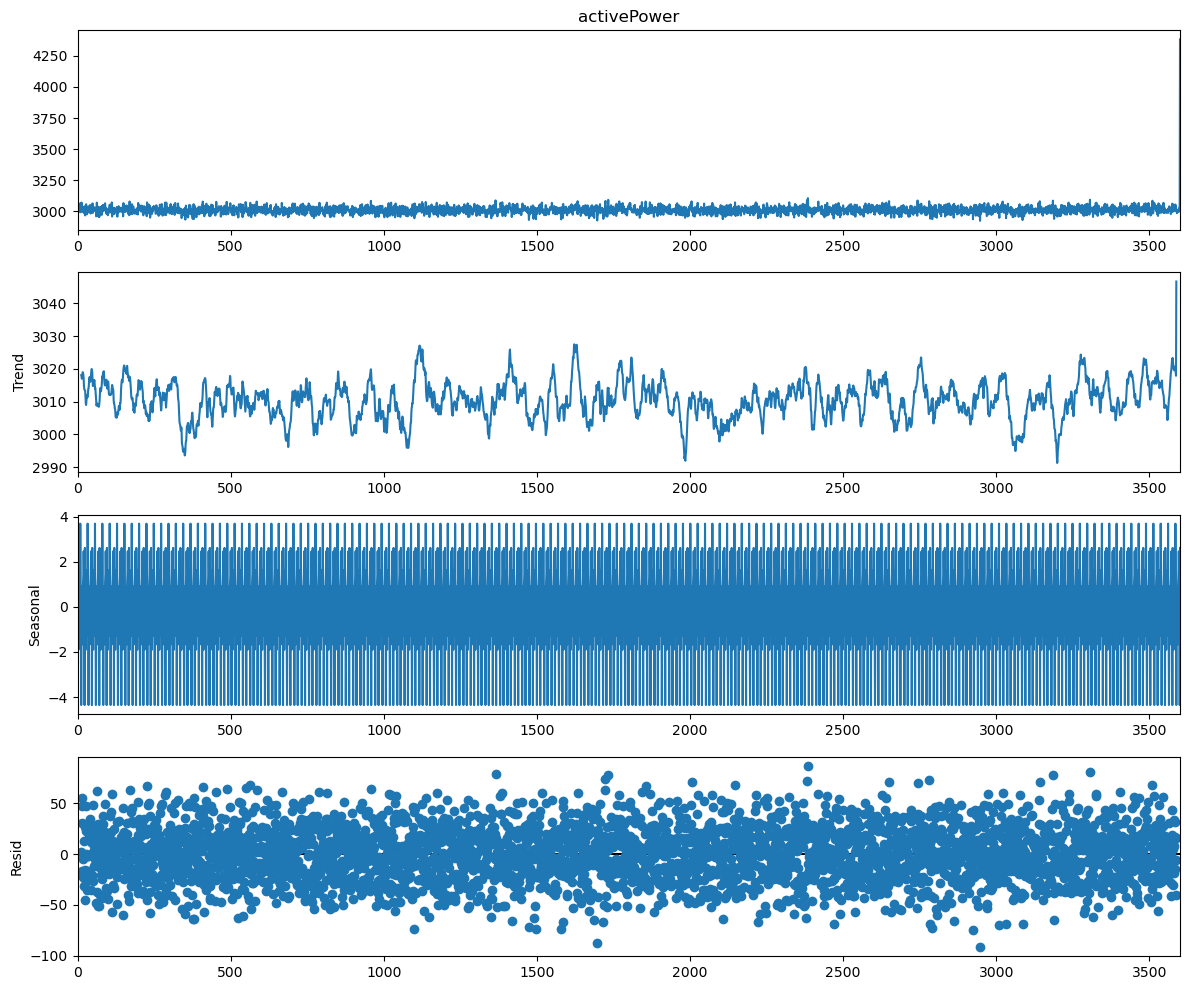

In [23]:
# 시계열 분해 : 추세와 계절성 확인
# 데이터를 추세, 계절성, 잔차 세 가지 성분으로 분리해서 5월 예측을 위한 뼈대 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해 (주기를 24시간으로 설정)
result = seasonal_decompose(target_series, model='additive', period=24)

plt.rcParams['figure.figsize'] = [12, 10]
result.plot()
plt.show()

In [24]:
# 설비별 변동계수(CV) 계산
cv_results = df_hourly.groupby('module(equipment)')['activePower'].agg(['mean', 'std'])
cv_results['CV'] = (cv_results['std'] / cv_results['mean']) * 100
cv_results = cv_results.sort_values(ascending=False, by='CV')

print("--- [설비별 변동성(CV) 순위] ---")
print("CV가 높을수록 패턴 예측이 중요하고 어려운 설비입니다.")
display(cv_results)

--- [설비별 변동성(CV) 순위] ---
CV가 높을수록 패턴 예측이 중요하고 어려운 설비입니다.


,mean,std,CV
module(equipment),,,
15(예비건조기),3009.926396,39.151544,1.300748
1(PM-3),3010.794108,35.094318,1.165617
17(6호기),3009.565466,34.949942,1.161295
3(분쇄기(2)),3009.905655,33.386056,1.109206
4(분쇄기(1)),3010.447874,31.642503,1.051090
2(L-1전등),3010.179145,31.210094,1.036818
14(2호기),3009.935887,30.217710,1.003932
12(4호기),3010.227561,29.140430,0.968047
16(호이스트),3009.910669,28.843485,0.958284


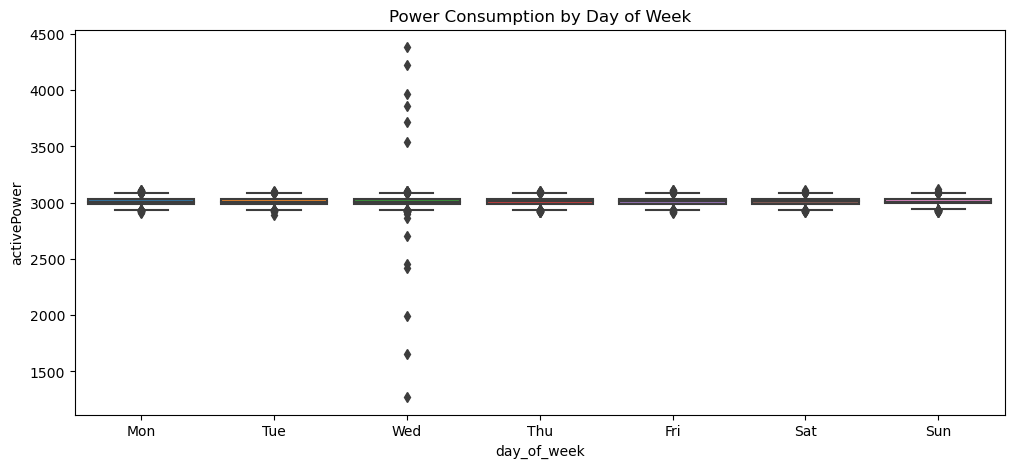

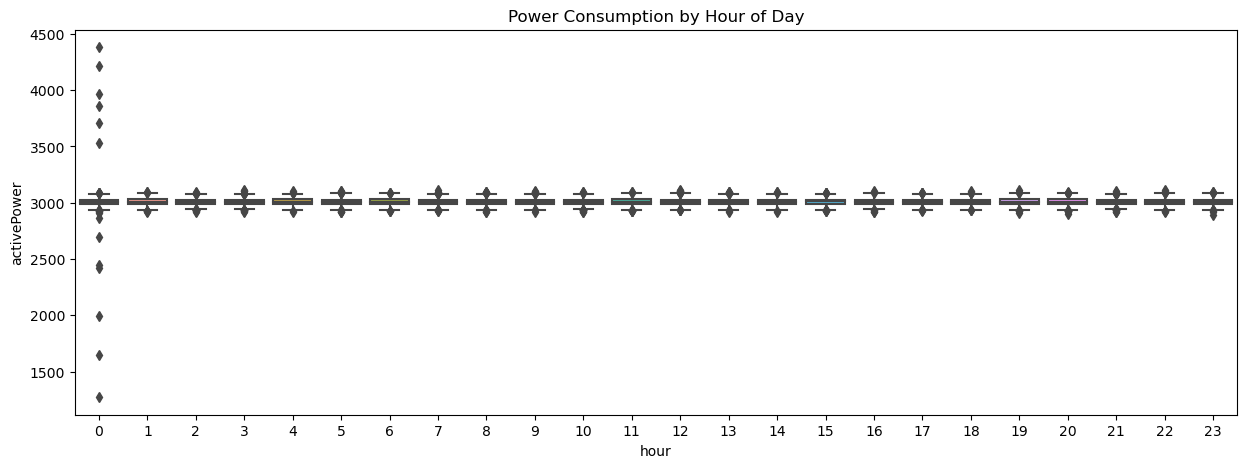

In [26]:
# 시간적 패턴 분석: 요일 및 시간대별 차이
# 변동성이 워낙 작기에 일반적인 선 그래프 보다는 박스플롯을 통해 중앙값의 미세한 변화를 확인하는 것이 좋음
import seaborn as sns
# 1. 요일(Day of Week) 및 시간(Hour) 정보 추출
df_hourly['day_of_week'] = df_hourly['localtime'].dt.dayofweek # 0=월, 6=일
df_hourly['hour'] = df_hourly['localtime'].dt.hour

# 2. 요일별 전력 소비 분포 시각화
plt.figure(figsize=(12, 5))
sns.boxplot(x='day_of_week', y='activePower', data=df_hourly)
plt.title('Power Consumption by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# 3. 시간대별 전력 소비 분포 시각화
plt.figure(figsize=(15, 5))
sns.boxplot(x='hour', y='activePower', data=df_hourly)
plt.title('Power Consumption by Hour of Day')
plt.show()

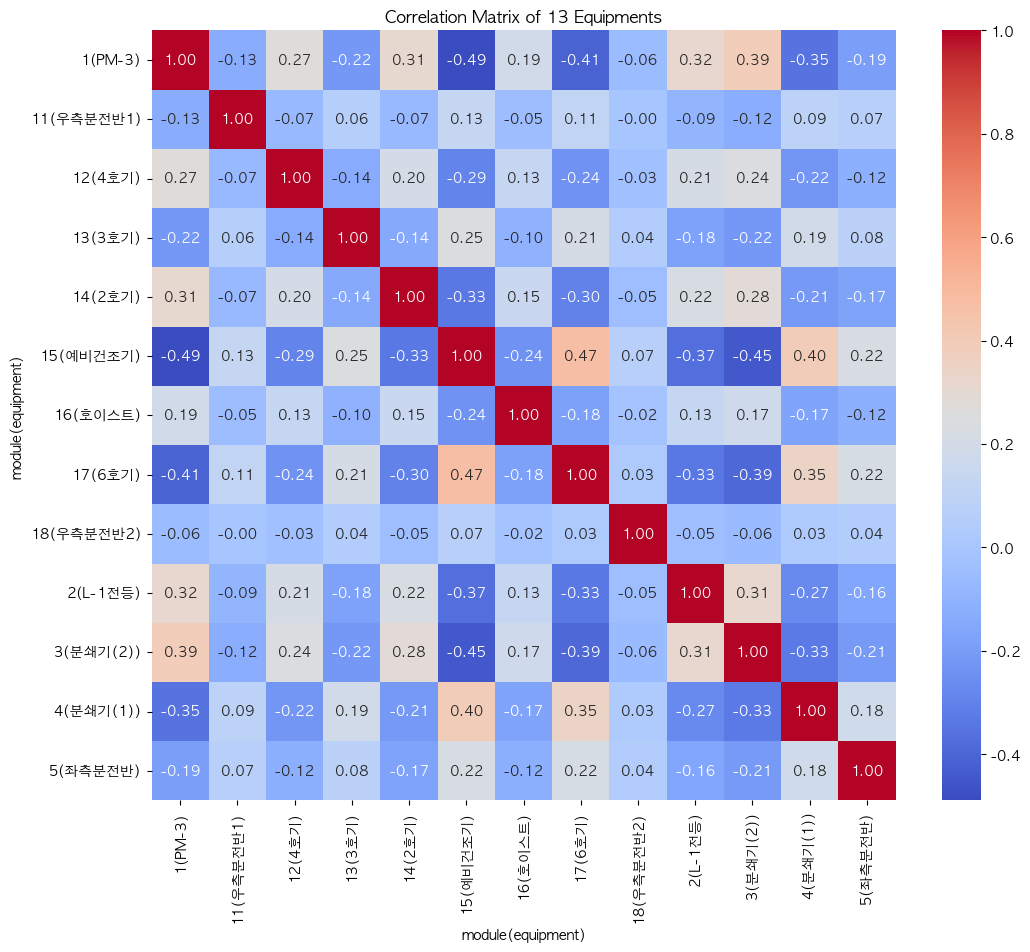

In [29]:
# 설비 간 상관관계 분석
# 13대 설비가 얼마나 비슷하게 움직이는지 확인하여, 이 데이터가 독립적인 설비들인지 아니면 하나의 소스에서 파생된 것인지 판별
# 1. 설비별 activePower를 컬럼으로 갖는 피벗 테이블 생성
df_pivot = df_hourly.pivot(index='localtime', columns='module(equipment)', values='activePower')

# 2. 상관계수 행렬 계산
corr_matrix = df_pivot.corr()

# 3. 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of 13 Equipments')
plt.show()

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [30]:
# 설비별로 누적 에너지의 차분(변화량) 계산
df_hourly['energy_delta'] = df_hourly.groupby('module(equipment)')['accumActiveEnergy'].diff()

# activePower와 energy_delta의 상관관계 확인
correlation = df_hourly[['activePower', 'energy_delta']].corr().iloc[0, 1]
print(f"유효전력과 에너지 변화량의 상관계수: {correlation:.4f}")

유효전력과 에너지 변화량의 상관계수: 0.4065


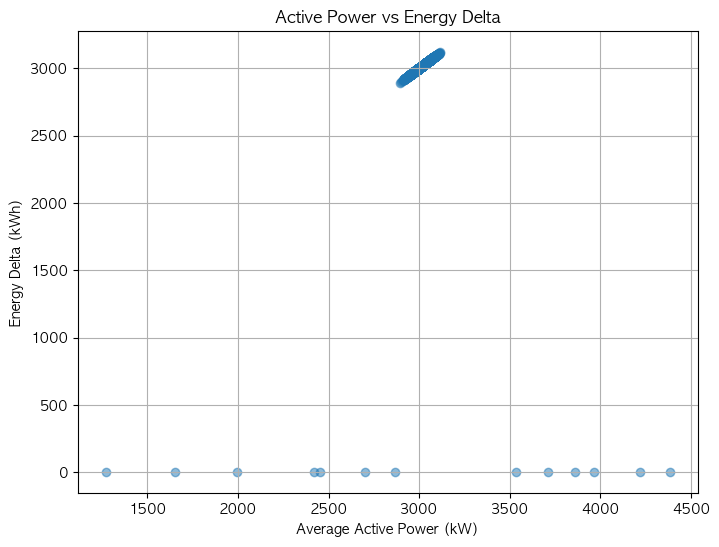

--- [에너지 변화량 이상치 체크] ---
음수 발생 횟수: 0
변화량 최대값: 3118.0
변화량 최소값: 2.0


In [31]:
import matplotlib.pyplot as plt

# 1. 시각적 확인: 두 변수의 관계가 직선을 이루는지 확인
plt.figure(figsize=(8, 6))
plt.scatter(df_hourly['activePower'], df_hourly['energy_delta'], alpha=0.5)
plt.title('Active Power vs Energy Delta')
plt.xlabel('Average Active Power (kW)')
plt.ylabel('Energy Delta (kWh)')
plt.grid(True)
plt.show()

# 2. 음수 값이나 이상치(Outlier) 확인
print("--- [에너지 변화량 이상치 체크] ---")
print(f"음수 발생 횟수: {(df_hourly['energy_delta'] < 0).sum()}")
print(f"변화량 최대값: {df_hourly['energy_delta'].max()}")
print(f"변화량 최소값: {df_hourly['energy_delta'].min()}")

In [32]:
## 전처리한 df_hourly 파일 저장하기
# 'df_hourly_preprocessed.csv'라는 이름으로 저장
df_hourly.to_csv('df_hourly_preprocessed.csv', index=False)

print("✅ 전처리된 데이터가 성공적으로 저장되었습니다.")

✅ 전처리된 데이터가 성공적으로 저장되었습니다.
